# Clusterización con K-Means


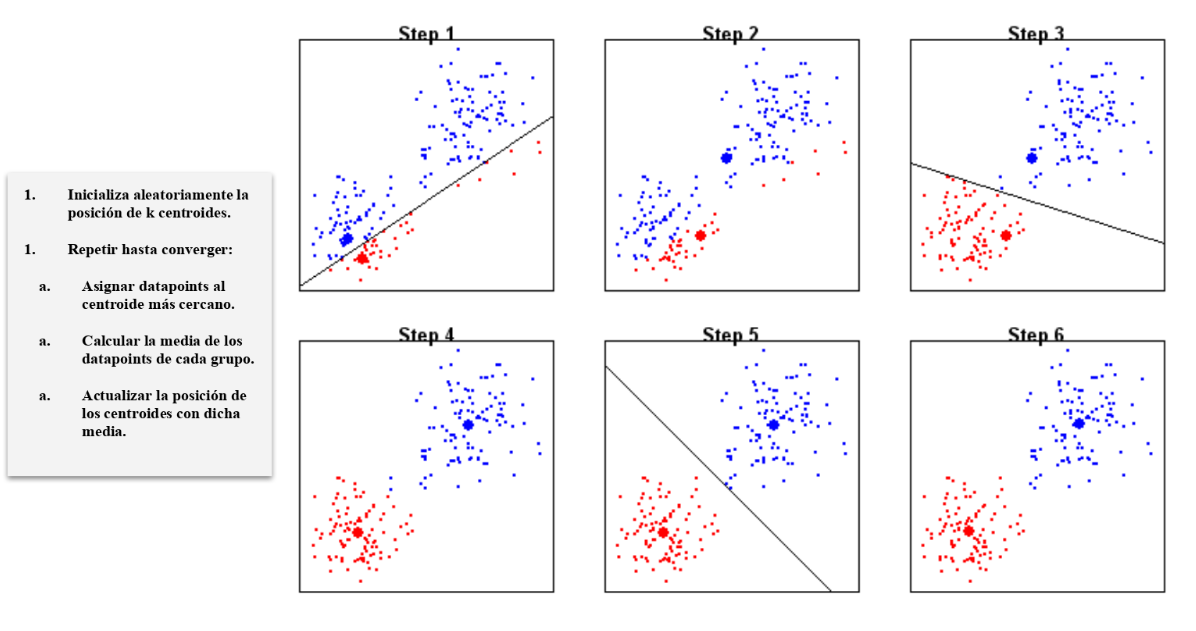

## 1. Implementando K-Means sobre Iris Dataset

---

**Tarea:** Implementar una función ***Kmeans($x_1$, $x_2$, $k$, $dist$, $max_iter$)***  que implemente el algoritmo de clusterización K-Means sobre la primera y segunda variable del dataset Iris Setosa (el de las flores ✿). En la celda de abajo se te proporciona una versión inicial del método a implementar, donde las variables de entrada ya son estandarizadas (importante cuando trabajamos con distancias),  y donde se visualizan las posiciones de los centroides inicializados aleatoriamente.

En la función implementada, se repetirán tantas iteraciones de la actualización de la posición de los centroides como indique el parámetro $max_iters$. Implementaciones más avanzadas utilizarían métodos que comprueben si el algoritmo ha convergido para decidir si dejar de iterar. Esto no es necesario en este caso. Visualizar en cada iteración la posición de los clusters y con colores señalar a cuál pertenece cada *datapoint.*

Después, implementar el resto de la lógica del algoritmo de KMeans. 

La función deberá devolver el vector de centroides actualizado y un vector de tamaño igual al número de registros de tus variables de entrada (**n**), donde se indique el índice del centroide asignado a cada *datapoint.* 

**(Bonus 1)** Utilizar el **Método del Codo** (y visualizar su gráfica) para seleccionar entre un rango diferentes de valores de **K**, el número de clusters óptimos.

**(Bonus 2)** En este caso no se utiliza el método KMeans++ para la inicialización de los centroides, que sería lo óptimo, sino inicialización aleatoria. ¿Cómo comprobar que el método K++ es mejor que la inicialización aleatoria? En este punto, puedes utilizar la información del vector $Y$ para ello.

In [2]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

# Cargamos los datos
X = load_iris().data

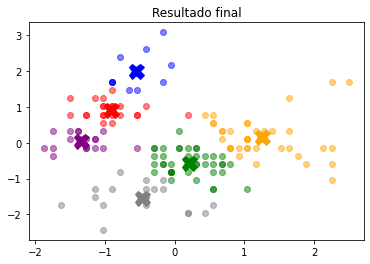

Text(0, 0.5, 'Sum of squared errors')

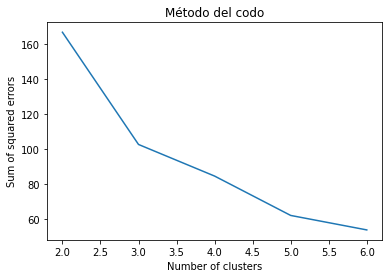

In [6]:

def Kmeans(x1, x2, k, dist, max_iters=20):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T


  # plt.title("Inicialización de K-Means")

  # Visualiza la posición de los centroides.
  colors = ["red", "blue", "green", "purple", "orange", "gray"]

  # for c in range(k):
  #   plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)

  # # Visualiza la nube de datos.
  #   plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)

  plt.show()
  #Para visualizar cada iteración
  # fig, axs = plt.subplots(0, 2, figsize = (15,15))
  for m in range(max_iters):

    xcent = np.zeros(len(x1)) #Centroide al que pertenece cada punto

    for i in range(len(x1)):
      
      a = [x1[i], x2[i]]
      dist1 = dist(a, centr[0,:]) #Distancia al primer centroide

      for c in range(1,k):
        dist2 = dist(a, centr[c,:])    
        random = np.random.choice([True, False])  
        if dist2 < dist1: #Calculamos el centroide más cercano
          dist1 = dist2
          xcent[i] = c
        elif ((dist2 == dist1) * random):  #Si es equidistante se asigna de manera aleatoria
          dist1 = dist2
          xcent[i] = c

    #Para visualizar cada iteración
    #fig, axs = plt.subplots(1, 2)  

    #for d in range(k):
      # axs[0].plot(centr[d, 0], centr[d, 1], c=colors[d], marker="X", markersize=15)
      # axs[0].scatter(x1[xcent==d],  x2[xcent==d], c=colors[d], alpha=0.5)
      # axs[0].axis('scaled')
      # axs[0].set_title("Iteración " + str(m+1))


    for c in range(k): #Actualización de los centroides
      centr[c,0] = np.mean(x1[xcent==c])
      centr[c,1] = np.mean(x2[xcent==c])
      # axs[1].plot(centr[e, 0], centr[e, 1], c=colors[e], marker="X", markersize=15)
      # axs[1].scatter(x1[xcent==e],  x2[xcent==e], c=colors[e], alpha=0.5)
      # axs[1].set_title('Nuevos centroides')
      # axs[1].axis('scaled')

  # for f in range(k):
  #   plt.plot(centr[f, 0], centr[f, 1], c=colors[f], marker="X", markersize=15)
  #   plt.scatter(x1[xcent==f],  x2[xcent==f], c=colors[f], alpha=0.5)
  #   plt.title("Resultado final  " + str(k) + " clusters")
  # plt.show()

  return centr, xcent
# ----------------------- #  

# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:

x1 = X[:, 0:1]
x2 = X[:, 1:2]
x1 = scale(x1, with_mean=True, with_std=True)
x2 = scale(x2, with_mean=True, with_std=True)


#BONUS 1 - Método del codo
  
maxk = 6
totaldist = np.zeros(maxk-1)


for i in range(2, maxk+1):
  centr, xcent = Kmeans(x1, x2, i, dist)
  
  for j in range(i):
    for a, b in zip(x1[xcent==j], x2[xcent==j]):
      totaldist[i-2] = totaldist[i-2] + (dist(centr[j], [a, b])**2)

colors = ["red", "blue", "green", "purple", "orange", "gray"]

for c in range(6):
  plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
  plt.scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
plt.title("Resultado final")
plt.show()

plt.plot(np.arange(2,maxk+1), totaldist)
plt.title('Método del codo')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

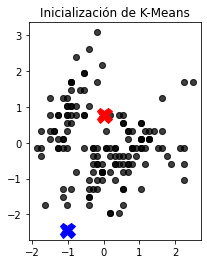

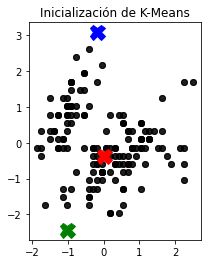

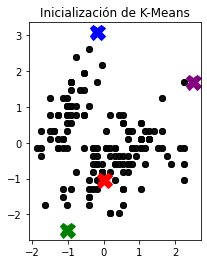

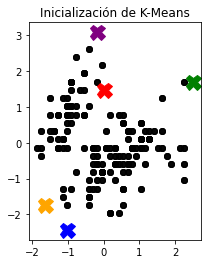

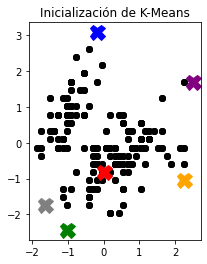

Text(0, 0.5, 'Sum of squared errors')

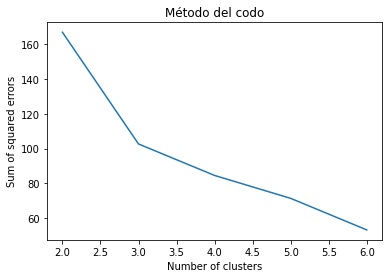

In [7]:
#BONUS 2 - KMeans ++

def Kmeansplus(x1, x2, k, dist, max_iters=20):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  centr = np.zeros(2*k).reshape(k,2)
  # Inicialización aleatoria del primer centroide.
  ic  = np.random.choice(x1.shape[0])
  
  centr[0,1] = x1[ic]
  centr[0,1] = x2[ic]

  #KMEANS++
  #Asignamos cada centroide al punto más alejado de los centroides ya asignados
  for i in range(1,k):
    distmax = 0
    for j in range(len(x1)):
      a = [x1[j], x2[j]]
      distc = 0  
      for p in range(i):
        distc = distc + dist(a, centr[p,:])   #Distancia a todos los centroides ya asignados

      if (distc > distmax) and (x1[j] not in centr[:,0]): #Elegimos el punto más alejado como centroide y que no sea ya uno
        distmax = distc
        centr[p+1,0] = x1[j]
        centr[p+1,1] = x2[j]

  plt.title("Inicialización de K-Means")

  #Visualiza la posición de los centroides.
  colors = ["red", "blue", "green", "purple", "orange", "gray"]

  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)

  # Visualiza la nube de datos.
    plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  plt.axis('scaled')
  plt.show()
  #Para visualizar cada iteración
  # fig, axs = plt.subplots(0, 2, figsize = (15,15))
  for m in range(max_iters):

    xcent = np.zeros(len(x1)) #Centroide al que pertenece cada punto

    for i in range(len(x1)):

      a = [x1[i], x2[i]]
      dist1 = dist(a, centr[0,:]) #Distancia al primer centroide

      for c in range(1,k):
        dist2 = dist(a, centr[c,:])      
        random = np.random.choice([True, False])  
        if dist2 < dist1: #Calculamos el centroide más cercano
          dist1 = dist2
          xcent[i] = c
        elif ((dist2 == dist1) * random):  #Si es equidistante se asigna de manera aleatoria
          dist1 = dist2
          xcent[i] = c

    #Para visualizar cada iteración
    #fig, axs = plt.subplots(1, 2)  

    #for c in range(k):
      # axs[0].plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
      # axs[0].scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
      # axs[0].axis('scaled')
      # axs[0].set_title("Iteración " + str(m+1))


    for c in range(k): #Actualización de los centroides
      centr[c,0] = np.mean(x1[xcent==c])
      centr[c,1] = np.mean(x2[xcent==c])
      # axs[1].plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
      # axs[1].scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
      # axs[1].set_title('Nuevos centroides')
      # axs[1].axis('scaled')

  # for c in range(k):
  #   plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
  #   plt.scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
  #   plt.title("Resultado final  " + str(k) + " clusters")
  # plt.show()

  return centr, xcent

#Hacemos otra vez el método del codo

x1 = X[:, 0:1]
x2 = X[:, 1:2]
x1 = scale(x1, with_mean=True, with_std=True)
x2 = scale(x2, with_mean=True, with_std=True)

colors = ["red", "blue", "green", "purple", "orange", "gray"]
maxk = 6
totaldist = np.zeros(maxk-1)


for i in range(2, maxk+1):
  centr, xcent = Kmeansplus(x1, x2, i, dist)
  
  for c in range(i):
    for j, k in zip(x1[xcent==c], x2[xcent==c]):
      totaldist[i-2] = totaldist[i-2] + (dist(centr[c], [j, k])**2)


plt.plot(np.arange(2,maxk+1), totaldist)
plt.title('Método del codo')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
